#### Importando as bibliotecas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### Importando datasets

In [5]:
df = pd.read_csv(r'D:\Documentos\FIAP - Pos Tech Data Analytics\Aulas\Fase 2\Dados\dados_imoveis.csv', sep=',')
display(df.head(2))

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


##### Analisando as correlações

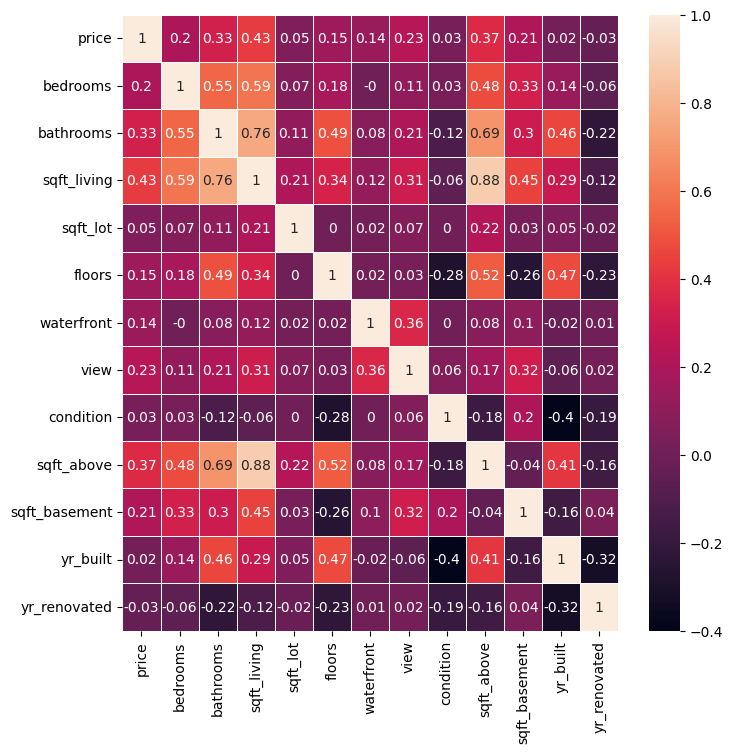

In [6]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr().round(2)

fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

Vou avaliar a correlação das features 'sqft_living' e 'bathrooms'comparado a 'price'

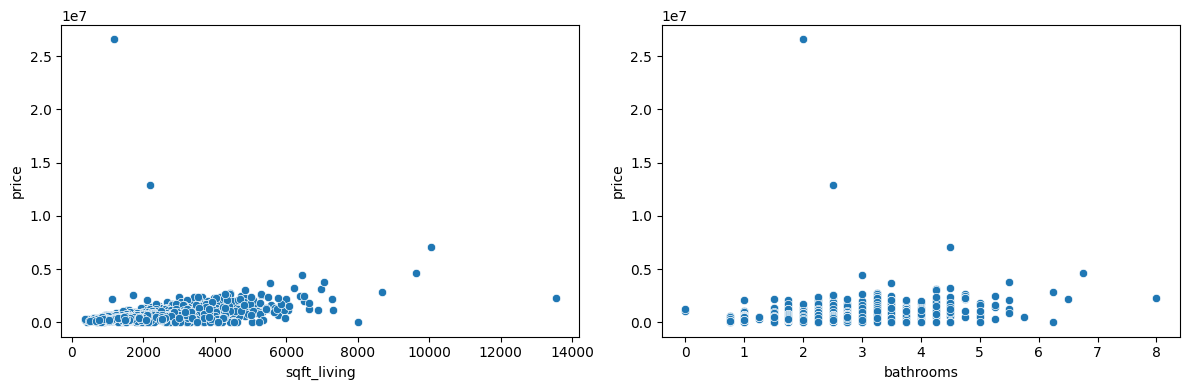

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.scatterplot(data=df, x='sqft_living', y='price', ax=ax[0])
sns.scatterplot(data=df, x='bathrooms', y='price', ax=ax[1])

fig.tight_layout()
plt.show()

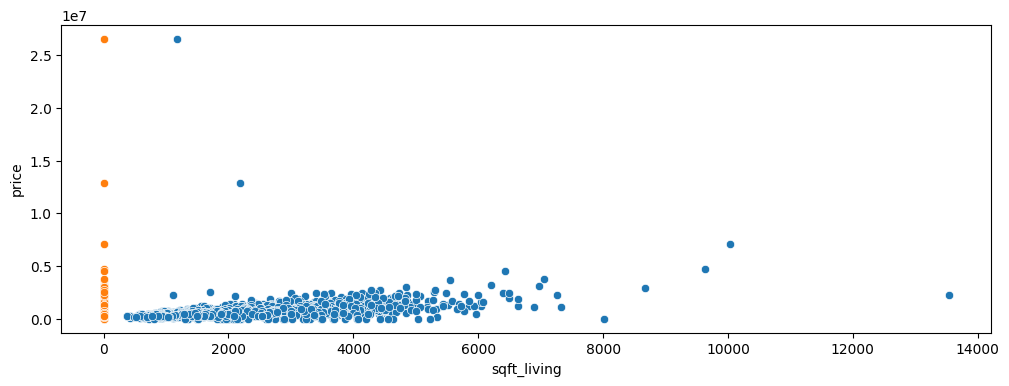

In [8]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.scatterplot(data=df, x='sqft_living', y='price')
sns.scatterplot(data=df, x='bathrooms', y='price')
plt.show()

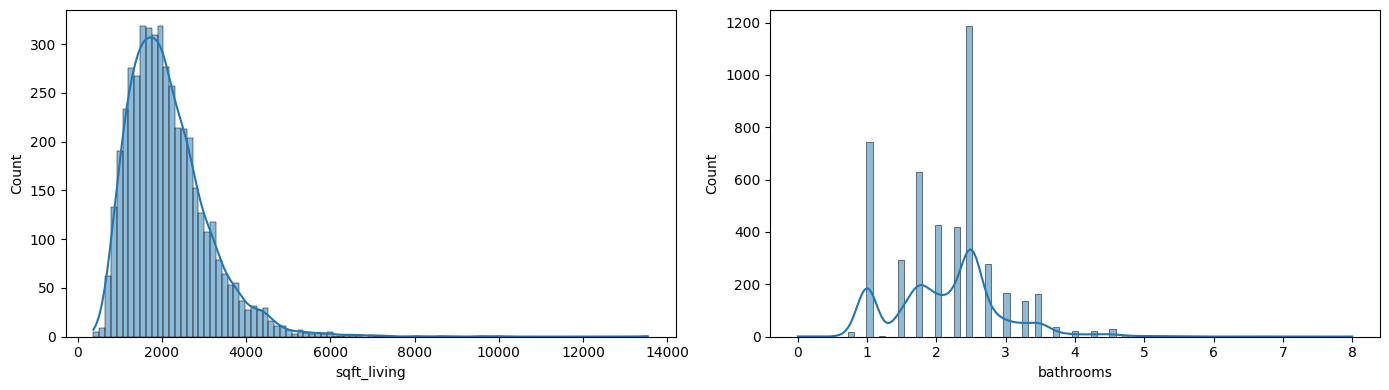

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.histplot(data=df, x='sqft_living', kde=True, ax=ax[0])
sns.histplot(data=df, x='bathrooms', kde=True, ax=ax[1])

fig.tight_layout()
plt.show()

In [10]:
x = df[['sqft_living', 'bathrooms']].values
y = df['price'].values

In [11]:
# Padronização das escalas dos dados

scaler = StandardScaler()
x_std = scaler.fit_transform(x)

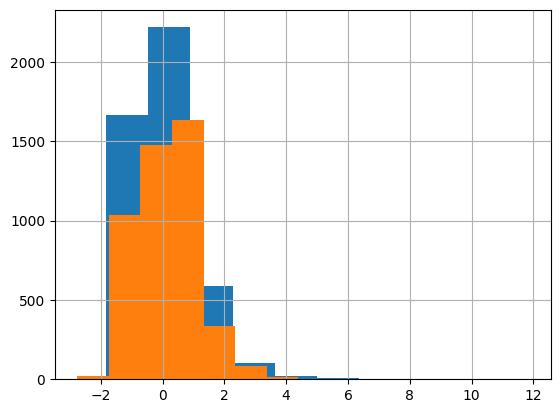

In [12]:
df_x_std = pd.DataFrame(x_std, columns=['sqft_living', 'bathrooms'])

df_x_std.sqft_living.hist()
df_x_std.bathrooms.hist()
plt.show()

#### Criação do Modelo de previsão - Linear Regression

Separando as bases de treino e teste

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=7)

Normalizando as escalas

In [14]:
scaler = MinMaxScaler()

scaler.fit(x_train)

MinMaxScaler()

In [15]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

Instanciando e treinando o modelo

In [16]:
model = LinearRegression()

model.fit(x_train_scaled, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(x_test_scaled)

#### Avaliando o modelo

In [18]:
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {MAE}')
print(f'R2: {r2}')

MAE: 173536.74188212887
R2: 0.460589559677016


In [19]:
model_normal = LinearRegression()

model_normal.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred_normal = model_normal.predict(x_test)

In [21]:
MAE = mean_absolute_error(y_test, y_pred_normal)
r2 = r2_score(y_test, y_pred_normal)

print(f'MAE: {MAE}')
print(f'R2: {r2}')

MAE: 173536.74188212887
R2: 0.460589559677016
